## CS 5010 Group Project
<br>
Analyzing Apartment Data Across the US
<br>
Presenter: Xin Huang (xh2jg)
<br>
Group "DJX": David Ackerman (dja2dg),  Jeremey Donovan (jdd5dw), Xin Huang (xh2jg)    

## Research Questions

1.Predict apartment price given attributes from independent data sets
<br>
Application: To help lessors set and renters pay fair market prices


2.Understand how attributes of the 'average' apartment varies by city/state
<br>
Application: To help people moving to new cities decide where they are most likely to get the housing they desire.


In [6]:
import os 
%cd "C:\Users\hx-cn\Dropbox\Education\UVA- Data Science\CS 5010\Advanced Projects\jupyter scripts"
import pylab as pl
from pandas import *

C:\Users\hx-cn\Dropbox\Education\UVA- Data Science\CS 5010\Advanced Projects\jupyter scripts


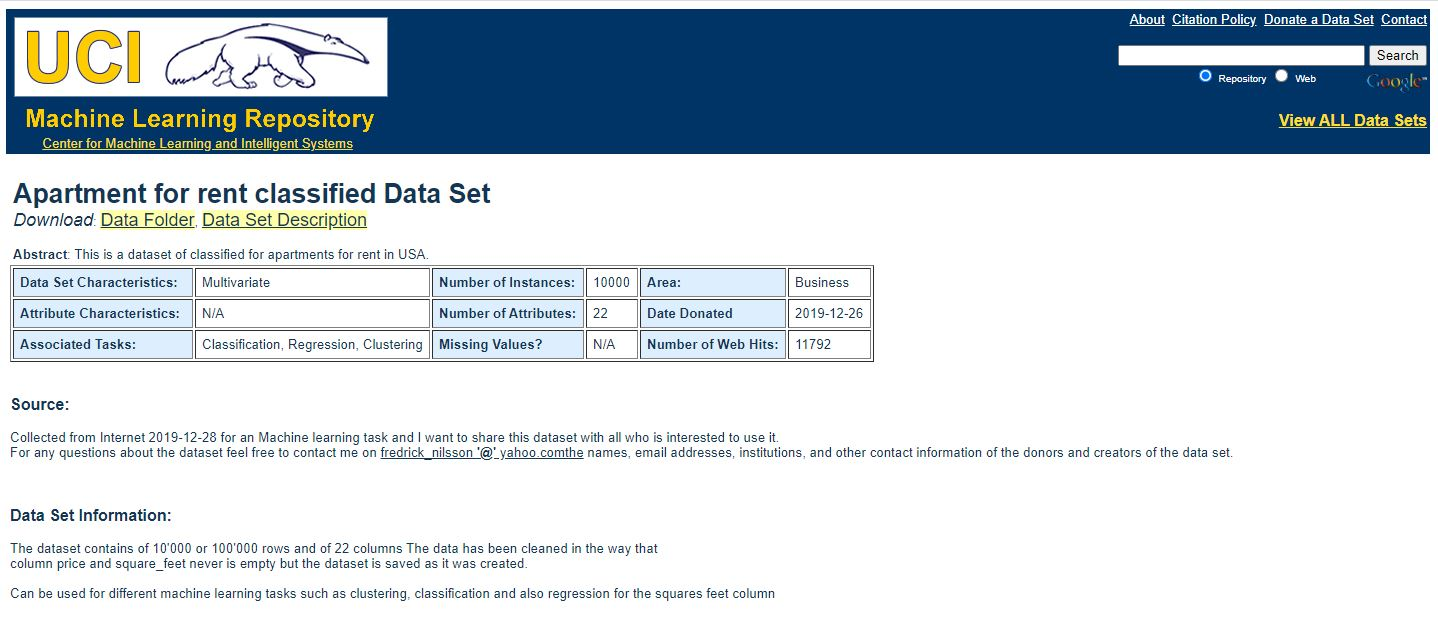

In [28]:
#Data Source
#https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o
#https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
from IPython.display import Image
Image(filename = "UCI Source.JPG", width=1000, height=100)

## Topic 1: the Dataset

In [12]:
# read data into dataframe
# Encoding issue: https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
import pandas as pd
df1 = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';',encoding = "ISO-8859-1")
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 22 columns


In [14]:
pd.set_option('display.max_columns', None)
df1.head(2)

id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   

   bedrooms currency fee  has_photo pets_allowed  price price_display  \
0       0.0      USD  No  Thumbnail         None    790          $790   
1       1.0      USD  No  Thumbnail         None    425          $425   

  price_type  square_feet         address    cityname state  latitude  \
0    Monthly          101             NaN  Washington    DC   38.9057   
1    Monthly          106  814 Schutte Rd  Evansville    IN   37.9680   

   longitude     source        time  
0   -76.9861  RentLingo  1577359415  
1   -87.6621  RentLingo  1577017063

In [16]:
#!pip install plotly
#!pip install cufflinks
#https://www.kaggle.com/kurianbenoy/ensemble-regression-berlin-apartment/comments
import plotly.express as px
df_train = df1[['category', 'bathrooms','bedrooms','square_feet','price','cityname','state','latitude','longitude']].dropna()
print(f'Train data has {df_train.shape[0]} rows and {df_train.shape[1]} colummns')

fig = px.line_mapbox(df_train, lat="latitude", lon="longitude", color="state", zoom=1, height=550)
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=9, mapbox_center_lat = 52.5027778,
    margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Train data has 9883 rows and 9 colummns


In [11]:
df1['state'].nunique() 

51

## Topic 2: Understand the attributes

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

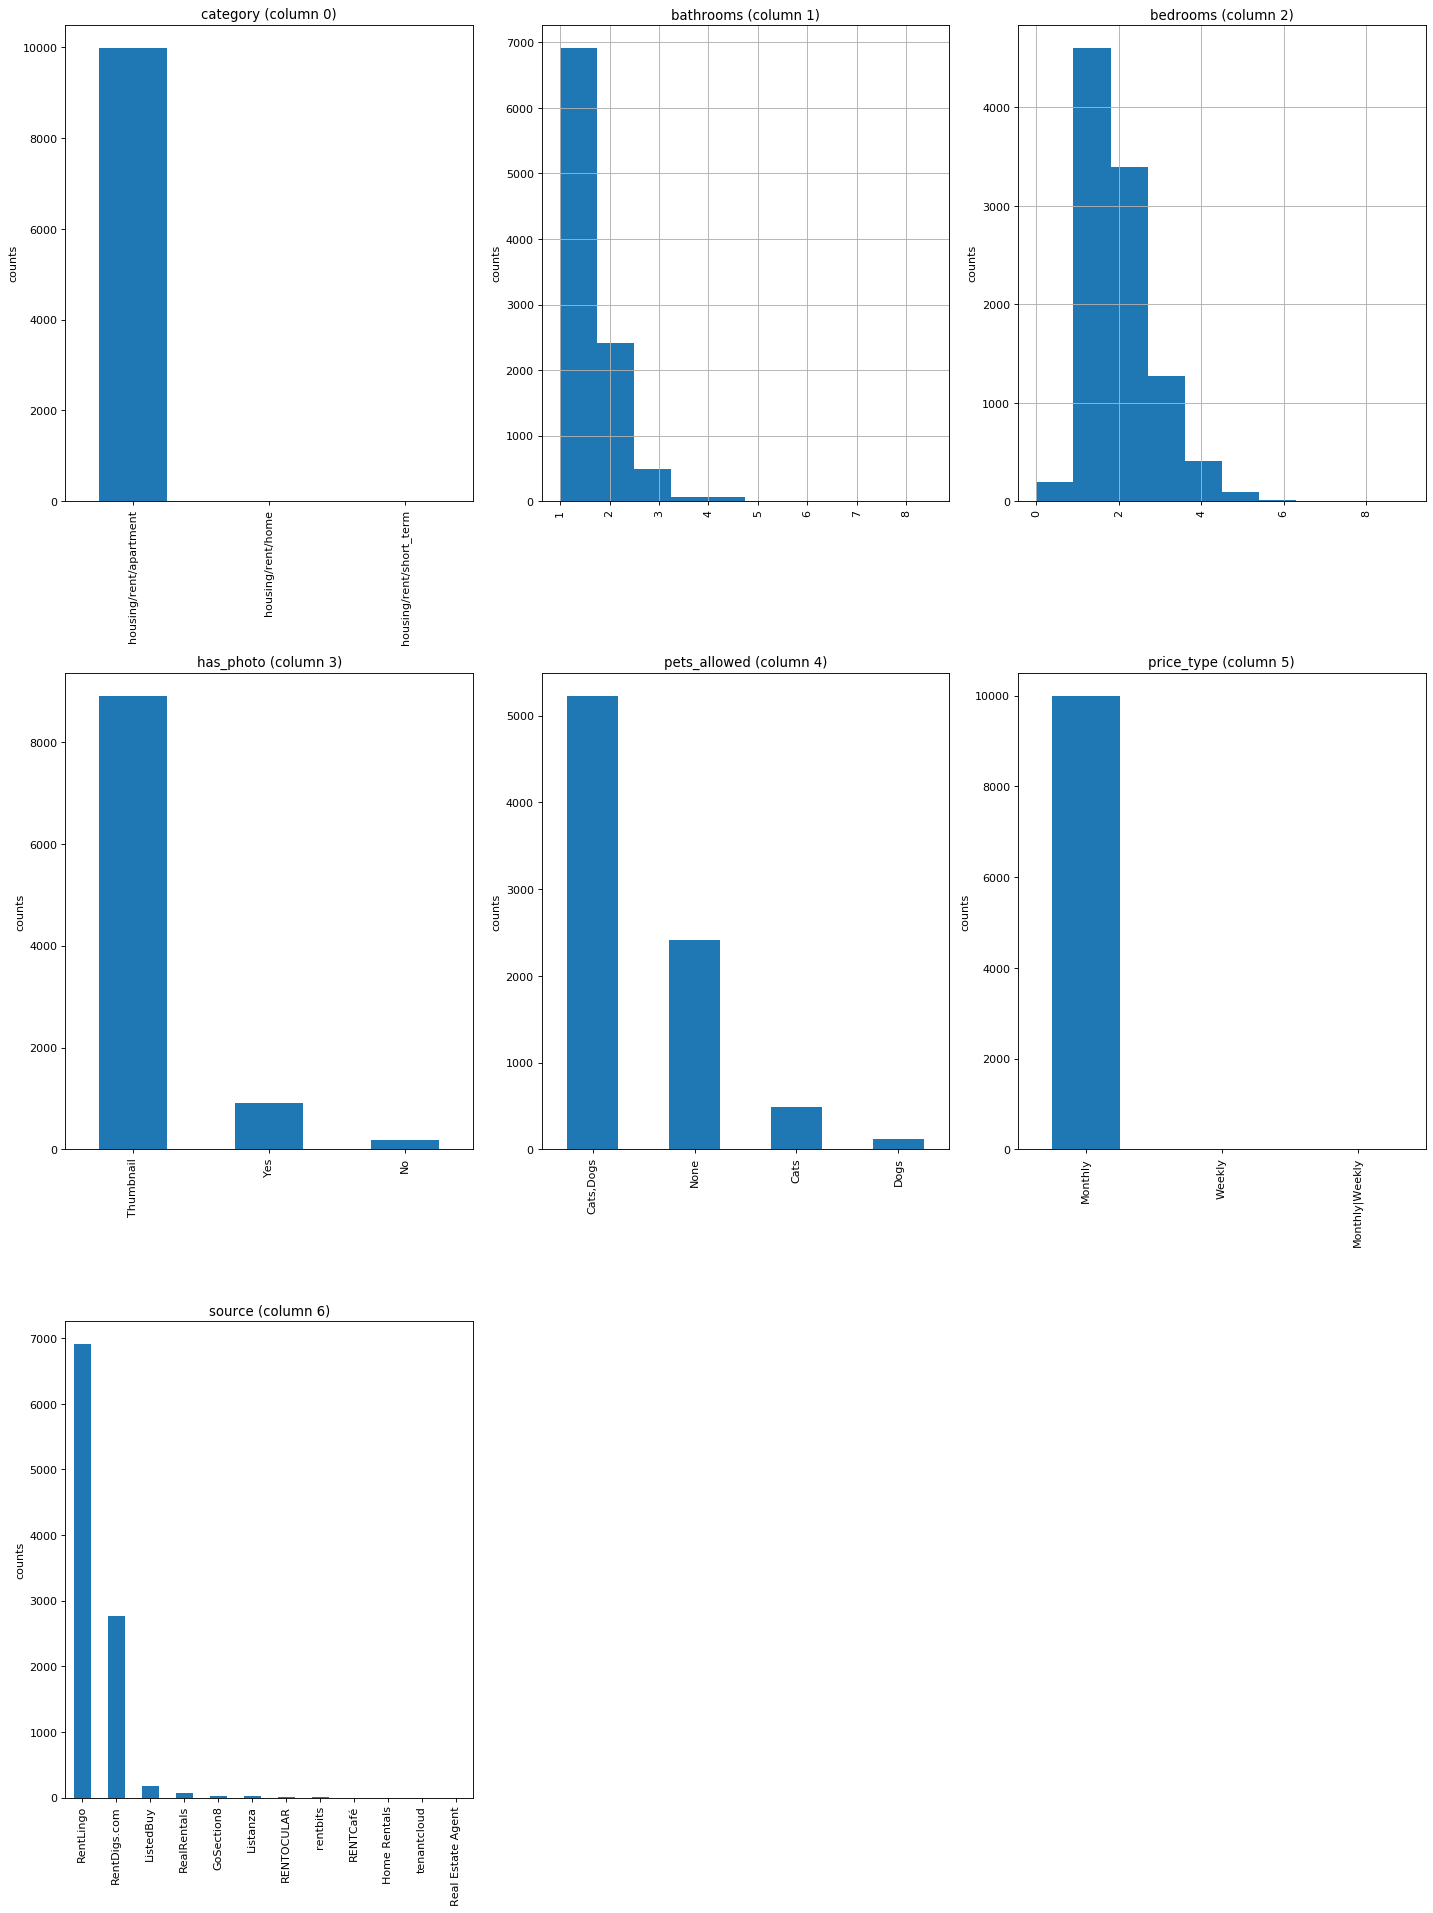

In [8]:
plotPerColumnDistribution(df1, 10, 3)

Text(0.5, 0.98, 'Nation Wide Apartment Square_feet distribution')

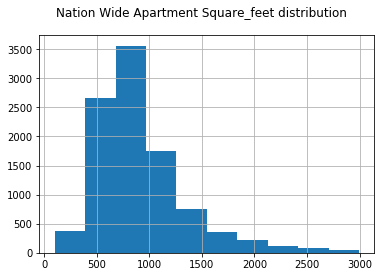

In [30]:
df1['square_feet'][df1['square_feet']<3000].hist()
pl.suptitle("Nation Wide Apartment Square_feet distribution")

Text(0.5, 0.98, 'Nation Wide Apartment Price distribution')

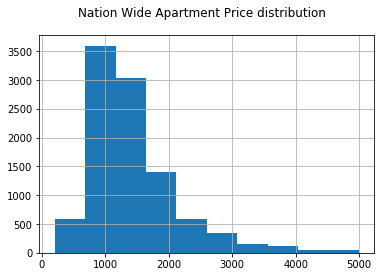

In [29]:
# Normal Price Distribution
df1['price'][df1['price']<5000].hist()
pl.suptitle("Nation Wide Apartment Price distribution")

## Topic 3: How rent varies by State

### Does Hawaii has the highest rent?

Text(0.5, 1.0, 'Average Price by State')

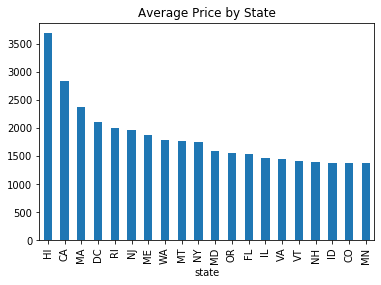

In [116]:
# Average Price by State
df_mean=df1.groupby('state').price.mean().sort_values(ascending=False).head(20)
df_bar=df_mean.plot.bar()
pl.title('Average Price by State')

### California has the highest rent per bedroom

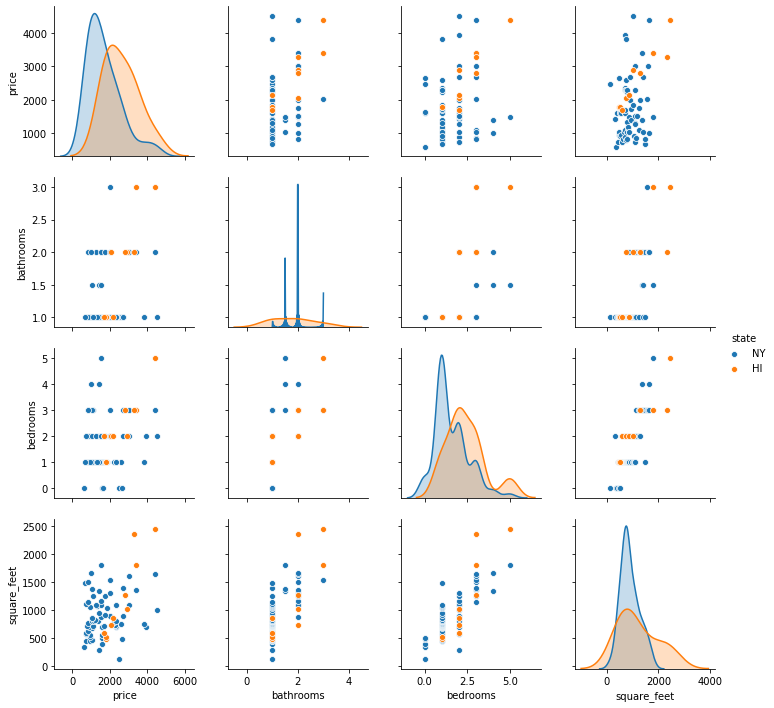

In [37]:
# Compare New York and Hawaii State Apartment List Price
import seaborn as sns
df_plot=df1[ ['price','bathrooms', 'bedrooms', 'square_feet','amenities', 'state','cityname']]
df_plot=df_plot[(df_plot['price']<5000) & (df_plot['square_feet']<3000) & (df_plot['state'].isin(['HI','NY']))]
sns.pairplot(df_plot, hue='state')

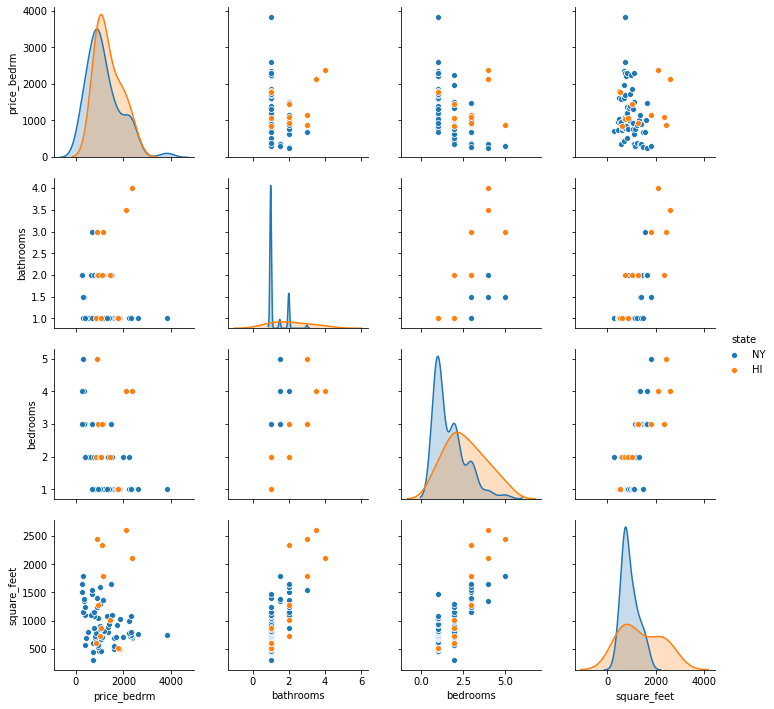

In [36]:
# Compare New York and Hawaii State Apartment Price per Bedroom
import seaborn as sns
df_plot=df2[ ['price_bedrm','bathrooms', 'bedrooms', 'square_feet','amenities', 'state','cityname']]
df_plot=df_plot[(df_plot['price_bedrm']<5000) & (df_plot['square_feet']<3000) & (df_plot['state'].isin(['NY','HI']))]
sns.pairplot(df_plot, hue='state')

C:\Users\hx-cn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5, 1.0, 'Average Price Per Bedroom by State')

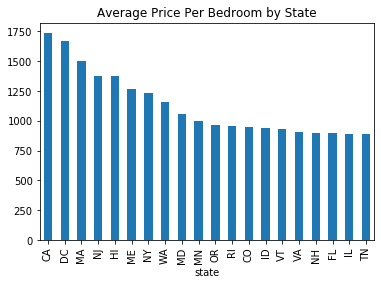

In [31]:
# Average Price per bedroom by State
df2=df1[(df1['price']>0)& (df1['bedrooms']>0)]
df2['price_bedrm']=df2['price']/df2['bedrooms']
df_pbmean=df2.groupby('state').price_bedrm.mean().sort_values(ascending=False).head(20)
df_pbmean.plot.bar()
pl.title('Average Price Per Bedroom by State')

## Topic 4: Renting in VA vs. CA

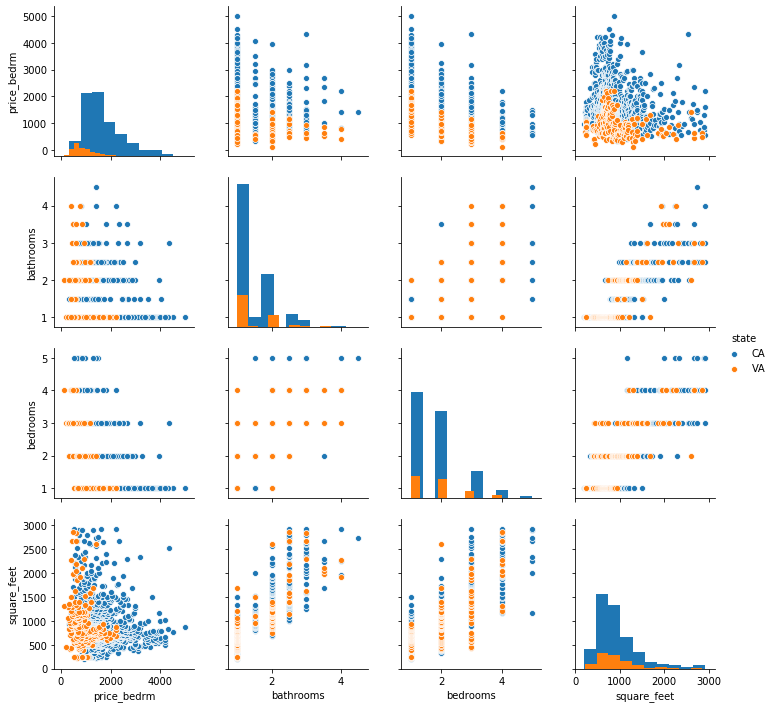

In [107]:
# Compare VA and New York State Apartment Price 
import seaborn as sns
df_plot=df2[ ['price_bedrm','bathrooms', 'bedrooms', 'square_feet','amenities', 'state','cityname']]
df_plot=df_plot[(df_plot['price_bedrm']<5000) & (df_plot['square_feet']<3000) & (df_plot['state'].isin(['CA','VA']))]
sns.pairplot(df_plot, hue='state', diag_kind="hist")


## Conclusion:


In [119]:
1. Python has powerful visualization tools
2. Discriptive analysis and visualization is an easy way to quickly undertsand the data and examining data quality
3. Visualization can also generate insights by itself
3. Understand the data is critical for peroper scaling & metrics construction 

SyntaxError: invalid syntax (<ipython-input-119-bcab6d3dcdae>, line 1)